In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import (mean_squared_error, mean_absolute_error, r2_score)
from sklearn.model_selection import RandomizedSearchCV

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df_raw = pd.read_pickle("data/preprocessed_data.pkl")

In [3]:
# need to figure out how to pre process these fields
df_raw = df_raw.drop(['city', 'state'], axis=1)

In [4]:
y = df_raw["los"]

features = []
for col in df_raw.columns:
    if col != "los":  # Skip the 'Target' column if it exists
        features.append(col)

X = df_raw[features]


In [5]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [6]:
# for col in df_raw.columns:
#     print(col)

In [7]:
# df_raw.dtypes

age                                                           int64
size                                                          int64
los                                                           int64
breed_secondary                                               int64
breed_mixed                                                   int64
good_with_children                                            int64
good_with_dogs                                                int64
good_with_cats                                                int64
attribute_spayed_neutered                                     int64
attribute_house_trained                                       int64
attribute_special_needs                                       int64
attribute_shots_current                                       int64
breed_primary_Akita                                           uint8
breed_primary_American Bulldog                                uint8
breed_primary_American Staffordshire Terrier    

In [8]:
# split data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=312)

In [9]:
# set up hyperparameter search space for the random forest regressor
random_grid = {
    "bootstrap": [True, False],
    "max_depth": [int(x) for x in np.linspace(10, 110, num=11)],
    "max_features": ["auto", "sqrt", "log2"],
    # "max_leaf_nodes": None,
    # "max_samples": None,
    # "min_impurity_decrease": 0.0,
    "min_samples_leaf": [1, 2, 4, 8],
    "min_samples_split": [2, 4, 8, 16],
    # "min_weight_fraction_leaf": 0.0,
    "n_estimators": [int(x) for x in np.linspace(start=200, stop=2000, num=10)],
}

In [10]:
# train the regressor
regr = RandomForestRegressor(max_depth=5, random_state=312, criterion="mse")
regr_random = RandomizedSearchCV(estimator=regr, param_distributions=random_grid, n_iter=100, cv=5, random_state=312, n_jobs=-1)

regr_random.fit(X_train, y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: C

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: C

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: C

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: C

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: C

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: C

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: C

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: C

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: C

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: C

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: C

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: C

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: C

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: C

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(criterion='mse', max_depth=5,
                                                   random_state=312),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 8],
                                        'min_samples_split': [2, 4, 8, 16],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=312)

In [11]:
# print out selected parameters
best_params = regr_random.best_params_

print(regr_random.best_score_)
print(best_params)

0.08670183926307522
{'n_estimators': 1200, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 50, 'bootstrap': True}


In [12]:
# retrain using the best params
regr = RandomForestRegressor(n_jobs=-1, random_state=312).set_params(**best_params)
regr.fit(X_train, y_train)

RandomForestRegressor(max_depth=50, max_features='log2', min_samples_split=8,
                      n_estimators=1200, n_jobs=-1, random_state=312)

In [13]:
# infer on test data
yhat = regr.predict(X_test)

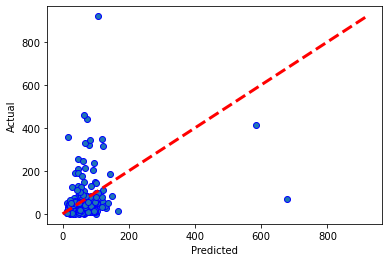

In [14]:
# plot inferences
fig, ax = plt.subplots()
ax.scatter(yhat, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

In [15]:
feature_importances = pd.Series(regr.feature_importances_, index=regr.feature_names_in_)

In [16]:
display(feature_importances.sort_values(ascending=False).head(20))

organization_name_Child and Pet Relief Fund [CPR Fund]        0.197108
organization_name_Feline Friends Chicago                      0.113304
color_secondary_Tricolor (Brown, Black, & White)              0.057106
breed_primary_Labrador Retriever                              0.053343
attribute_house_trained                                       0.040942
organization_name_Friends of Chicago Animal Care & Control    0.040268
size                                                          0.032580
organization_name_Chicago Animal Care and Control             0.029753
age                                                           0.027252
breed_secondary                                               0.027246
good_with_dogs                                                0.027209
coat_Short                                                    0.022639
breed_primary_English Bulldog                                 0.021192
breed_primary_Jack Russell Terrier                            0.020350
color_

In [17]:
# evaluate performance
mse = mean_squared_error(y_test, yhat)
mae = mean_absolute_error(y_test, yhat)
r2 = r2_score(y_test, yhat)

metrics_rfr = {
    "mse": mse,
    "mae": mae,
    "r2": r2,
}
# df_metrics = pd.DataFrame.from_dict(metrics, orient="index", columns=["RandomForestRegressor"])

# evaluate a baseline of always guessing the mean
yhat = np.ones((y_test.shape[0],1)) * y_train.mean()
mse = mean_squared_error(y_test, yhat)
mae = mean_absolute_error(y_test, yhat)
r2 = r2_score(y_test, yhat)

metrics_baseline = {
    "mse": mse,
    "mae": mae,
    "r2": r2,
}

In [18]:
df_metrics = pd.DataFrame.from_dict(data={"Baseline": metrics_baseline, "RandomForestRegressor": metrics_rfr})

In [19]:
display(df_metrics)

,Baseline,RandomForestRegressor
mse,7099.227131,7285.526947
mae,47.995070,43.120287
r2,-0.007664,-0.034107


### XGBoost

In [20]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

In [21]:
# Set up hyperparameter search space for the XGBoost regressor
param_grid = {
    "n_estimators": [100, 500, 1000],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1, 0.5],
    "subsample": [0.5, 0.75, 1.0],
    "colsample_bytree": [0.5, 0.75, 1.0],
}

In [23]:
regr = XGBRegressor(random_state=312, objective="reg:squarederror")
regr_cv = GridSearchCV(estimator=regr, param_grid=param_grid, cv=5, n_jobs=-1)
X_train.columns = [col.replace("[", "_").replace("]", "_") for col in X_train.columns]
regr_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estim

In [24]:
# Print out selected parameters
best_params = regr_cv.best_params_
print(f"Best score: {regr_cv.best_score_}")
print(f"Best parameters: {best_params}")

Best score: 0.10794049475713934
Best parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.75}


In [25]:
# Retrain using the best params
regr = XGBRegressor(random_state=312, objective="reg:squarederror").set_params(**best_params)
regr.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=312, ...)

In [27]:
# Infer on test data
X_test.columns = [col.replace("[", "_").replace("]", "_") for col in X_test.columns]
y_pred = regr.predict(X_test)

In [28]:
# Print feature importances
feature_importances = pd.Series(regr.feature_importances_, index=X_train.columns)
print("Top 20 most important features:")
print(feature_importances.sort_values(ascending=False).head(20))

Top 20 most important features:
organization_name_Child and Pet Relief Fund _CPR Fund_        0.497609
organization_name_Feline Friends Chicago                      0.297020
organization_name_Friends of Chicago Animal Care & Control    0.020961
breed_primary_Jack Russell Terrier                            0.013653
size                                                          0.012576
organization_name_Chicago Animal Care and Control             0.011216
attribute_house_trained                                       0.010210
color_primary_Brindle                                         0.009956
breed_primary_Brussels Griffon                                0.006783
color_primary_Red / Chestnut / Orange                         0.005934
breed_primary_German Shepherd Dog                             0.005680
breed_primary_English Bulldog                                 0.005500
age                                                           0.005428
attribute_special_needs                      

In [29]:
# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

metrics_xgb = {"mse": mse, "mae": mae, "r2": r2}

In [30]:
# Evaluate a baseline of always guessing the mean
y_mean = y_train.mean()
y_pred_baseline = np.full(y_test.shape, y_mean)
mse_baseline = mean_squared_error(y_test, y_pred_baseline)
mae_baseline = mean_absolute_error(y_test, y_pred_baseline)
r2_baseline = r2_score(y_test, y_pred_baseline)

metrics_baseline = {"mse": mse_baseline, "mae": mae_baseline, "r2": r2_baseline}

df_metrics = pd.DataFrame.from_dict(
    {"Baseline": metrics_baseline, "XGBRegressor": metrics_xgb}
)
print(df_metrics)

        Baseline  XGBRegressor
mse  7099.227131   8690.987369
mae    47.995070     37.046585
r2     -0.007664     -0.233598
